<a href="https://colab.research.google.com/github/benedi91/various_projects/blob/master/camera_calib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

here you have a program for camewra calibration. It is written for calibraton boad with circular grid, not chessboard, but you can easly convert it to use with chessboard pattern

In [4]:
#clone repository from my github in order to download the images for calibration
! git clone https://github.com/benedi91/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [0]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

In [6]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) 

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
x_size = 7
y_size = 5
dist = 275 #distance between from dots centers
objp = np.zeros((y_size*x_size,3), np.float32)

objp[:,:2] = np.mgrid[0:x_size,0:y_size].T.reshape(-1,2) 
objp = objp*dist
print(objp)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

[[   0.    0.    0.]
 [ 275.    0.    0.]
 [ 550.    0.    0.]
 [ 825.    0.    0.]
 [1100.    0.    0.]
 [1375.    0.    0.]
 [1650.    0.    0.]
 [   0.  275.    0.]
 [ 275.  275.    0.]
 [ 550.  275.    0.]
 [ 825.  275.    0.]
 [1100.  275.    0.]
 [1375.  275.    0.]
 [1650.  275.    0.]
 [   0.  550.    0.]
 [ 275.  550.    0.]
 [ 550.  550.    0.]
 [ 825.  550.    0.]
 [1100.  550.    0.]
 [1375.  550.    0.]
 [1650.  550.    0.]
 [   0.  825.    0.]
 [ 275.  825.    0.]
 [ 550.  825.    0.]
 [ 825.  825.    0.]
 [1100.  825.    0.]
 [1375.  825.    0.]
 [1650.  825.    0.]
 [   0. 1100.    0.]
 [ 275. 1100.    0.]
 [ 550. 1100.    0.]
 [ 825. 1100.    0.]
 [1100. 1100.    0.]
 [1375. 1100.    0.]
 [1650. 1100.    0.]]


In [0]:
#path to files
images = glob.glob('datasets/camera_calibration_images/*.bmp')

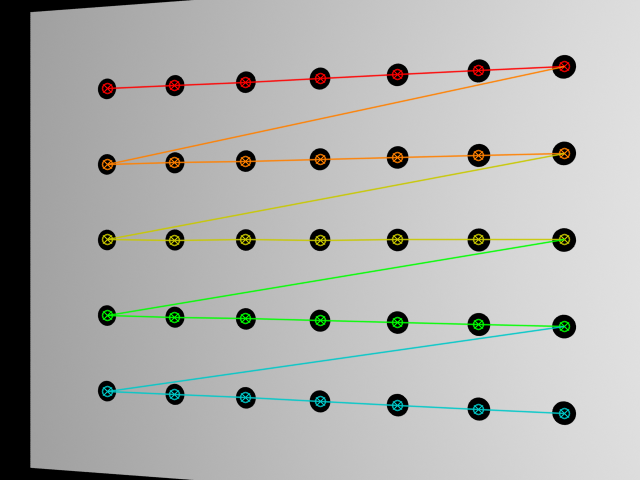

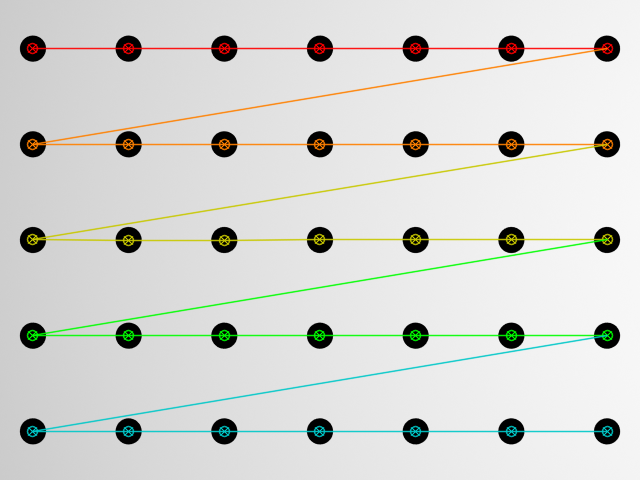

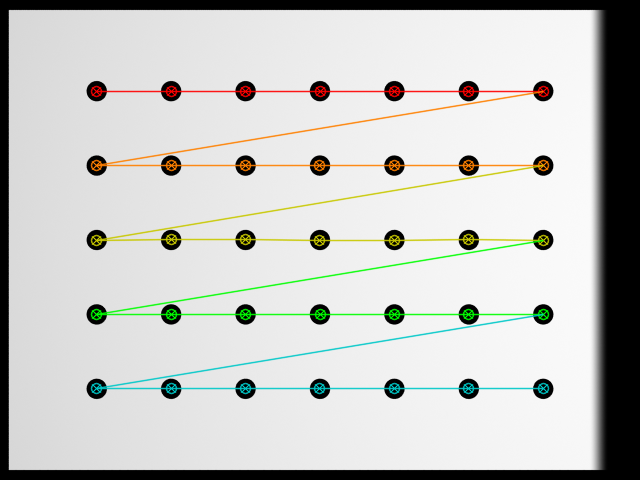

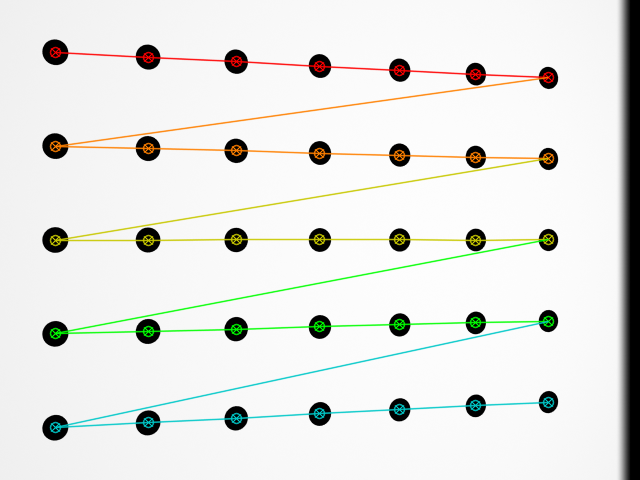

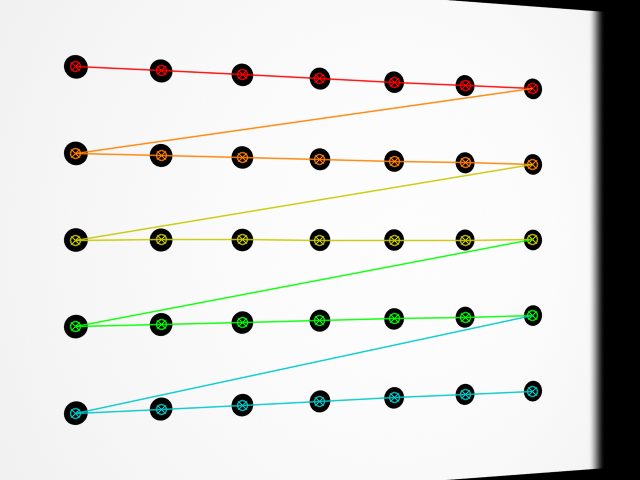

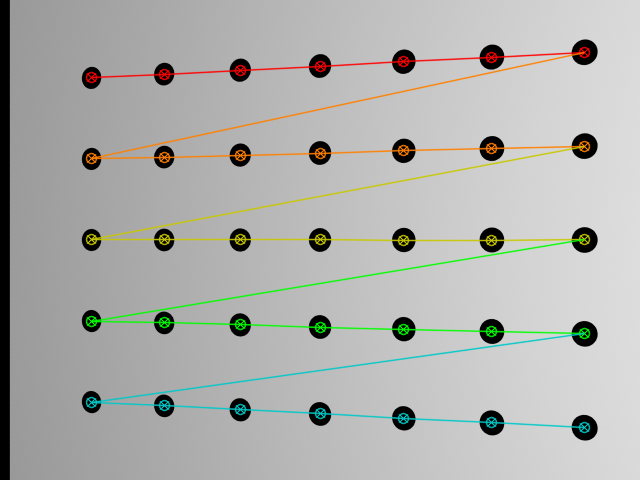

In [8]:
#loop that finds centers of the dots
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    

    # Find the chess board corners
    ret, corners = cv2.findCirclesGrid(gray,(x_size,y_size),None) #when using chessboard use cv2.findChessboardCorners() function
  
  
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
      
        corners2 =  corners #dont use cv.cornerSubPix() if you are not analysing a chessboard
        #corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria) 
        imgpoints.append(corners2)

        # Draw and displaly centers of the dots
        img = cv2.drawChessboardCorners(img, (x_size,y_size), corners2,ret)
        cv2_imshow(img)
        cv2.waitKey(500)
        


In [0]:
#output calibration variables
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [10]:
print(ret) #value should be under 1.0

0.015833277733083694


In [11]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print("total error: ", tot_error/len(objpoints))

total error:  0.0026517792478571514


In [0]:
#save output in your google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
np.savez(F"/content/gdrive/My Drive/camera_calibration.npz",ret=ret, mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)

Mounted at /content/gdrive


image number 1


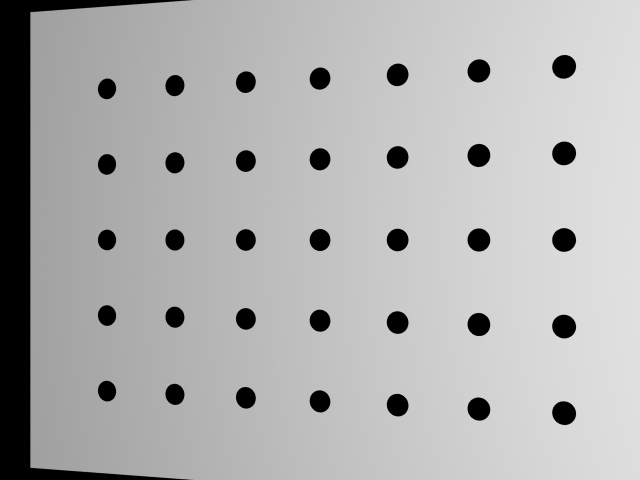

image number 2


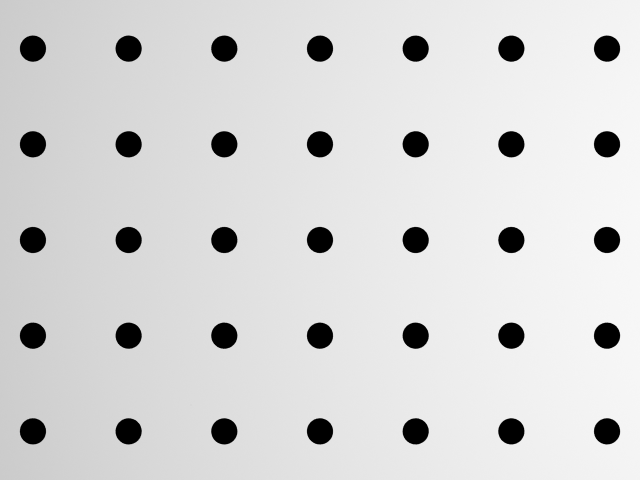

image number 3


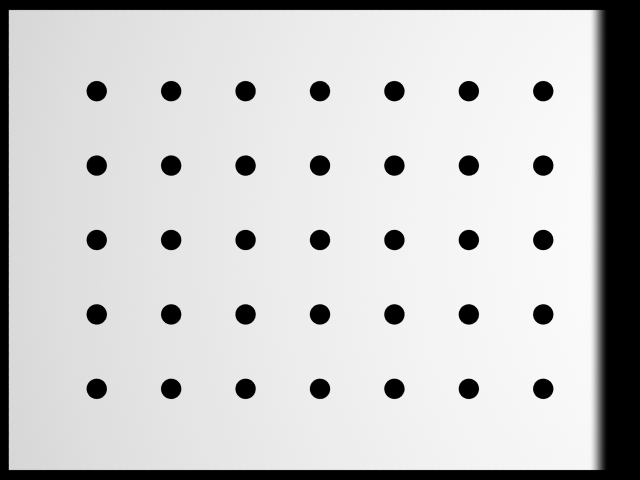

image number 4


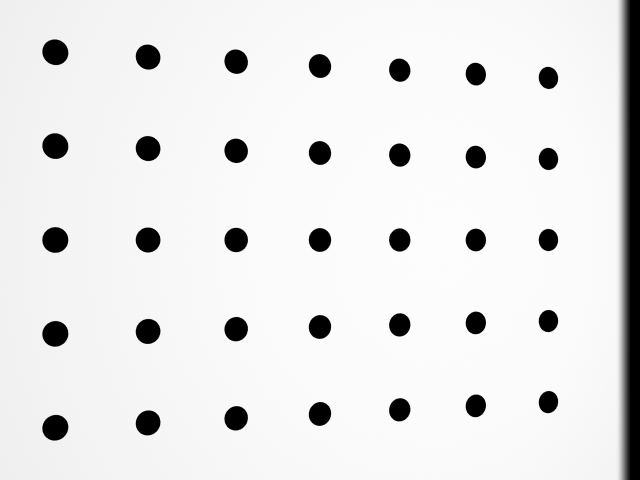

image number 5


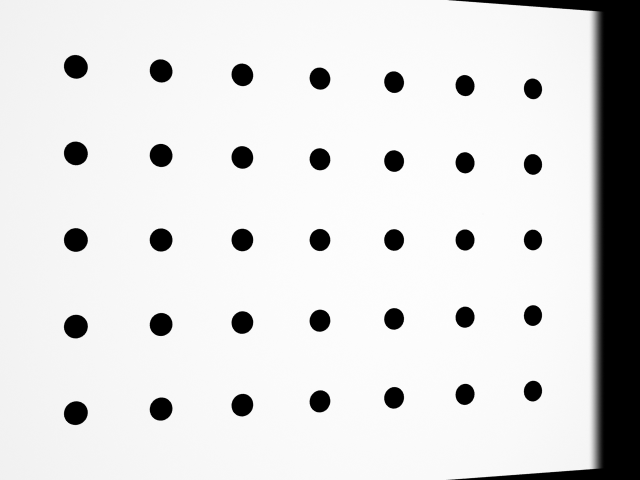

image number 6


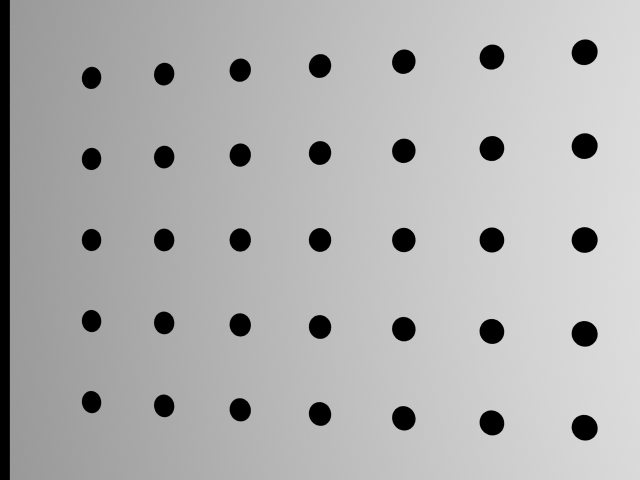

In [13]:
# after camera calibration, you can correct distortion of images taken by your camera
number = 1 #variable used to number the images
for fname in images:
   img = cv2.imread(fname)
   h,  w = img.shape[:2]
   newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
   # undistort
   dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

   # crop the image
   x,y,w,h = roi
   dst = dst[y:y+h, x:x+w]
   name = 'calibresult'+str(number)+'.bmp'
   cv2.imwrite(name,dst)
   print("image number " + str(number))
   number += 1
   imgg = cv2.imread(name)
   cv2_imshow(imgg)